<b style="font-size:2vw"><center>Polar (Nyquist) Plots</center></b>

<center><i><b>Document by:</b> Matt Capuano <i></center>

I write this document as I review my Polar plots, primarly through thus resource:
- System Dynamics (Ogata) | chapter 7.3

When you're trying to understand how these Polar plots are obtained, try to convert the transfer function to the imaginary number form $a + jb$. The polar plot is the plot of the frequency-response of the transfer function between the real and imaginary component as $\omega$ goes from 0 to $\infty$. So you can take your equation for the TF $G(j\omega)=a+jb$ and think about what happens at $\omega \rightarrow 0$, $\omega \rightarrow \infty$, and maybe some key points in between. The points on the polar plot are just the set of $(a, b)$ in between $\omega = 0 \rightarrow \infty$

In [29]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import control.matlab as cmatlab
from scipy import signal

# Plotting settings (to format plots nicely)
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Define s as being the transfer function Laplace variable
s = cmatlab.tf('s')

## <center>Integral and Derivative Factors $(j\omega)^{\mp1}$</center>

Consider this:
$$G(j\omega) = \frac{1}{j\omega} = -j\frac{1}{\omega}$$

There's no real component here... **so I'm not sure why the plot looks as it does below, it should only be an up arrow along the imaginary axis...?**

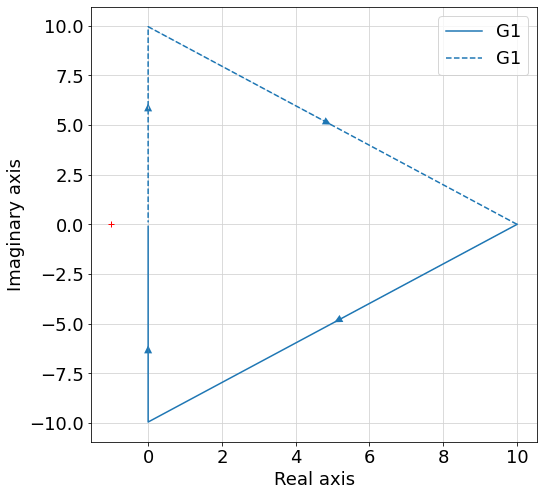

In [146]:
G1 = 1 / s
G2 = s

real, imag, freq = cmatlab.nyquist(G1, label='G1')
# real, imag, freq = cmatlab.nyquist(G2)
plt.legend()

**Note:** What happens if you multiply by a constant $K$?

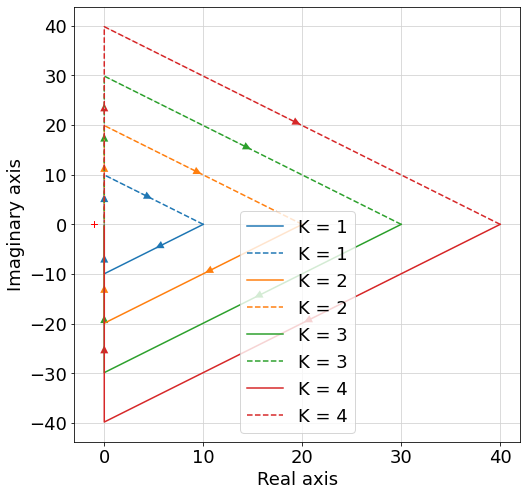

In [50]:
G = 1 / s

for K in range(1, 5):
    G1 = K * G;
    real, imag, freq = cmatlab.nyquist(G1, label="K = " + str(K))

plt.legend()

### Powers of Integral and Derivative Factors $(j\omega)^{\mp n}$

**For odd powers:** 
You're flipping the direction of the arrow from directly up to directly down every increasing odd power, mathematically this is because:
...

**For even powers (I HAVEN'T DOUBLE-CHECKED THIS YET):**
The imaginary term goes away. E.g.
$$G(j\omega) = \frac{1}{(j\omega)^2} = -\frac{1}{\omega}$$
So when $\omega = 0$, $G(j\omega) \rightarrow -\infty$ and as $\omega \rightarrow \infty$ then $G(j\omega) = -0$.
Every other even power, the -1 at the front becomes positive, so this is reflected across the imaginary axis.

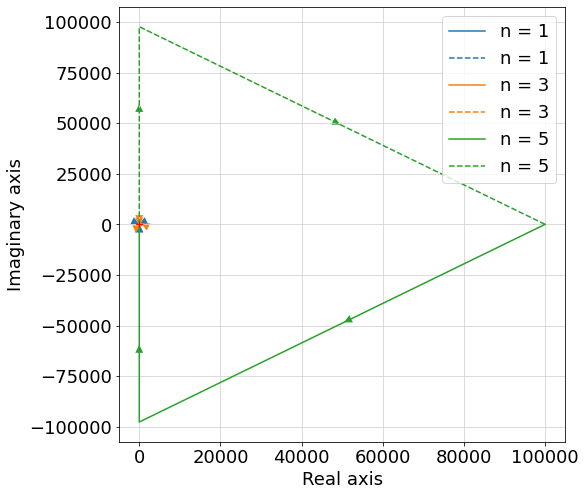

In [141]:
for n in range(1, 6, 2):
    G = 1 / (s**n)
    real, imag, freq = cmatlab.nyquist(G, label="n = " + str(n))

plt.legend()

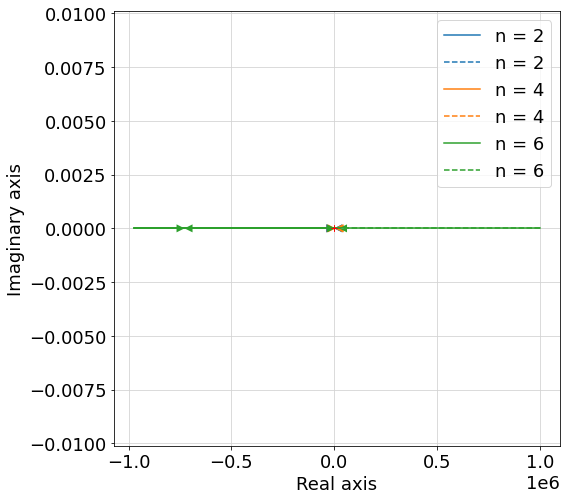

In [144]:
for n in range(2, 7, 2):
    G = 1 / (s**n)
    real, imag, freq = cmatlab.nyquist(G, label="n = " + str(n))

plt.legend()

## <center>First-Order Factors $(1+j\omega T)^{\mp1}$</center>

As $\omega$ increases from 0 to infinity, the magnitude and phase form a semi-circle.

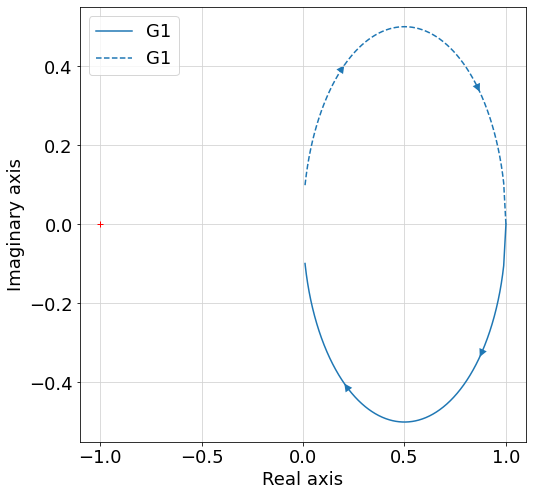

In [112]:
T = 1               # Defining the corner frequency as 1/T
G1 = 1 / (1 + T*s)
G2 = 1 + T*s

real, imag, freq = cmatlab.nyquist(G1, label='G1')
#real, imag, freq = cmatlab.nyquist(G2, label='G2')
plt.legend()

### Changing the Corner frequency
- From the corner frequency of $1/T = 1/1$ to $1/10$ everything is the same
- From the corner frequencies of $1/T = 1/10$ and below, everything shifts

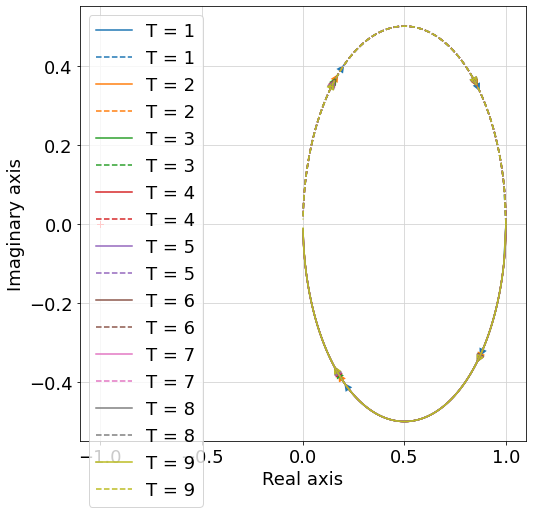

In [100]:
for T in range(1, 10, 1):
    G = 1 / (1 + T*s)
    real, imag, freq = cmatlab.nyquist(G, label="T = " + str(T))

plt.legend()

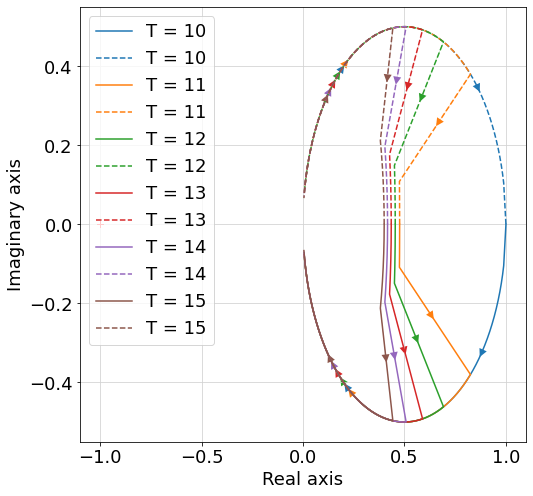

In [104]:
for T in range(10, 16, 1):
    G = 1 / (1 + T*s)
    real, imag, freq = cmatlab.nyquist(G, label="T = " + str(T))

plt.legend()

### Multiplying by a constant $K$

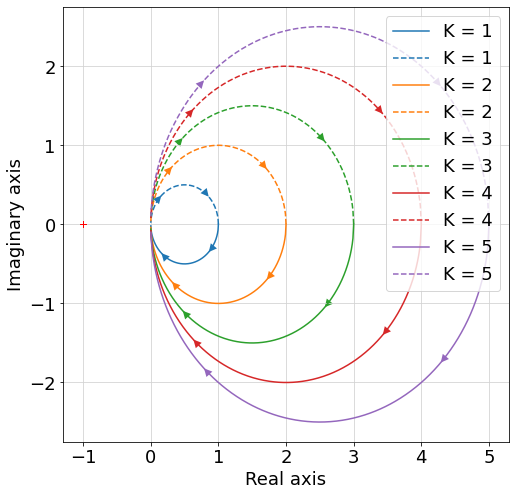

In [107]:
T = 5
G = 1 / (1 + T*s)

for K in range(1, 6):
    G1 = K * G;
    real, imag, freq = cmatlab.nyquist(G1, label="K = " + str(K))

plt.legend()

### Powers of First-Order Factors $(1+j\omega T)^{\mp n}$

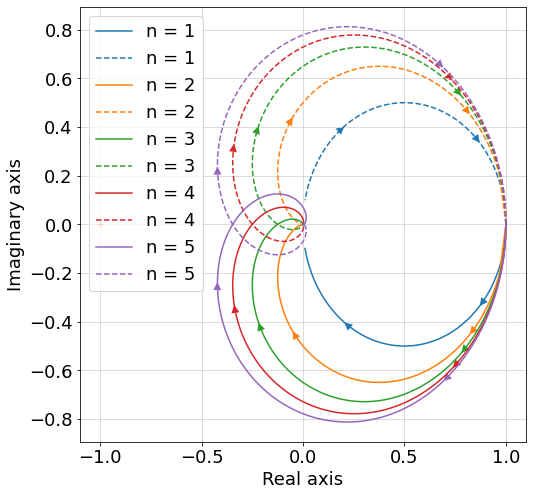

In [130]:
for n in range(1, 6, 1):
    G = (1 / (1 + T*s))**n
    real, imag, freq = cmatlab.nyquist(G, label="n = " + str(n))

plt.legend()

## <center>Second-Order Factors $\left[1 + 2\zeta \left(\frac{j\omega}{\omega_n}\right) + \left(\frac{j\omega}{\omega_n}\right)^2 \right]^{\mp1}$</center>

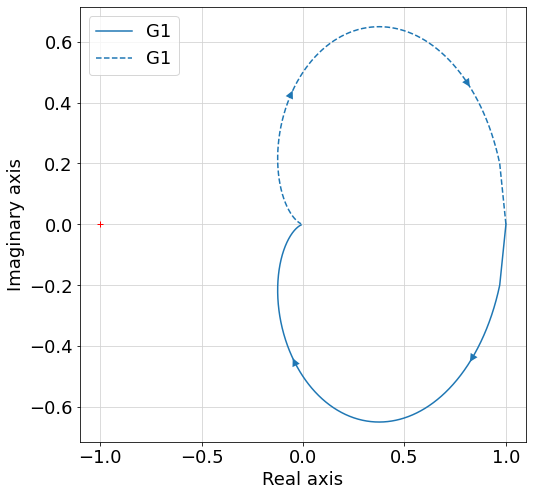

In [114]:
z = 1
omega_n = 1
G1 = 1 / (1 + (2*z*s/omega_n) + (s/omega_n)**2)
#G2 = (1 + (2*z*s/omega_n) + (s/omega_n)**2)

real, imag, freq = cmatlab.nyquist(G1, label='G1')
#real, imag, freq = cmatlab.nyquist(G2, label='G2')
plt.legend()

### Varying the Damping Coefficient $\zeta$

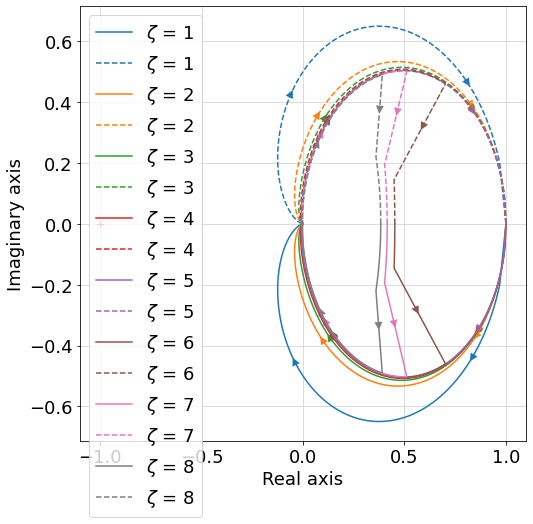

In [120]:
omega_n = 1
for zeta in range(1, 9, 1):
    G = 1 / (1 + (2*zeta*s/omega_n) + (s/omega_n)**2)
    real, imag, freq = cmatlab.nyquist(G, label='$\zeta$ = ' + str(zeta))
plt.legend()

### Varying the ... $\omega_n$

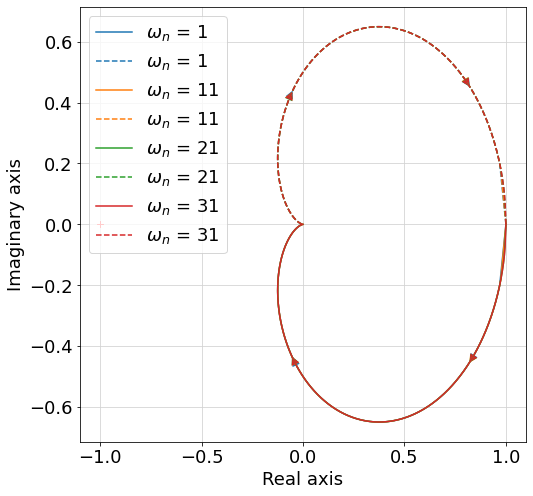

In [149]:
zeta = 1
for omega_n in range(1, 41, 10):
    G = 1 / (1 + (2*zeta*s/omega_n) + (s/omega_n)**2)
    real, imag, freq = cmatlab.nyquist(G, label='$\omega_n$ = ' + str(omega_n))
plt.legend()

### Powers of Second-Order Factors $\left[1 + 2\zeta \left(\frac{j\omega}{\omega_n}\right) + \left(\frac{j\omega}{\omega_n}\right)^2 \right]^{\mp n}$

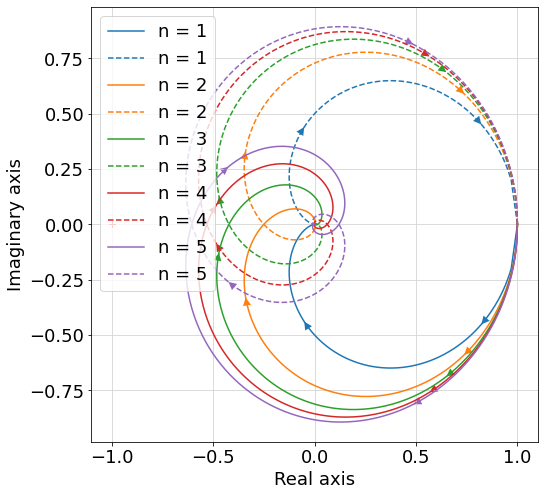

In [132]:
z = 1
omega_n = 1
for n in range(1, 6, 1):
    G = (1 / (1 + (2*z*s/omega_n) + (s/omega_n)**2))**n
    real, imag, freq = cmatlab.nyquist(G, label='n = ' + str(n))
plt.legend()

## <center>More Complex Examples</center>